# Assignment2

## Notebook made by  

|** Name** | **Student id** | **email**|
|:- |:-|:-|
|Niek de Visscher | 10667474 | niekdevisscher@hetnet.nl |
| Leon Smits | 10500731 | leonmarijnsmits@gmail.com|
| Daniël van lier | 10639861 | danielvanlier@gmail.com |

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. 

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='http://i.imgur.com/hConduu.jpg'/>
<img src='http://i.imgur.com/r4tIPrA.jpg?1'/>
<img src='http://i.imgur.com/KbRwRFz.jpg'/>

### Note
* **Assignments without the selfies or completely filled in information will not be graded and receive 0 points.**


# Part 1: obtaining information from the web

### RSS parsing

Make a notebook that performs the following steps.

1. Create a script that retrieves all urls of rss feeds from <http://www.volkskrant.nl/rss/feeds/>. Use urllib2 and beautifulsoup for this. Store the urls in a list.
    * **update 2016**
    * As all Dutch sites, Volkskrant asks whether you accept cookies. This makes simple collecting webpages a lot harder. 
    * The code in the code cell below does the trick. 
    * After running this, I could collect further files from Volkskrant without additional cookie hassle.
2. Download all rss feeds and store them on disk.
3. Parse all RSS feeds using `lxml`. Create a list of  dicts with fields "channel", "url", "title", "date" in which you store this information for each item.
4. Compute some statistics about this dict: how many items, how many per channel, are there doubles (items occuring in several channels), etc.
5. Write this list as a csv file, store on disk, and upload to Google fusion tables.
6. Download all articles (once), parse out the text and store as pairs (date,text) in a list.
7. Count per day the number of words, and the number of unique words. Show this in a plot.

In [13]:
import cookielib # Thanks to http://stackoverflow.com/questions/29395407/enabling-cookies-with-urllib
import urllib2
import urllib
import requests
import os
from bs4 import BeautifulSoup
import re 


url = 'https://rawgit.com/maartensukel/Data-Science/master/deVolkskrant.html'

# with urllib2 and handling cookies
cookiejar= cookielib.LWPCookieJar()
opener= urllib2.build_opener( urllib2.HTTPCookieProcessor(cookiejar) )
response=opener.open(url)
html_doc= ' '.join(response.readlines())
 
rsssoup = BeautifulSoup(html_doc)


In [14]:
#Rss parsing:
#Question 1:
#rss list
rss_list = []
list_items=rsssoup.findAll('li')
len(list_items)
count = 0
for x in list_items:
    y = str(list_items[count])
    if "rss.xml" in y:
        url = re.search('"(.+?)"', y).group(1)
        rss_list.append(url)
    count += 1

print rss_list

['http://www.volkskrant.nl/nieuws/rss.xml', 'http://www.volkskrant.nl/nieuws-voorpagina/rss.xml', 'http://www.volkskrant.nl/buitenland/rss.xml', 'http://www.volkskrant.nl/binnenland/rss.xml', 'http://www.volkskrant.nl/opinie/rss.xml', 'http://www.volkskrant.nl/economie/rss.xml', 'http://www.volkskrant.nl/sport/rss.xml', 'http://www.volkskrant.nl/tech/rss.xml', 'http://www.volkskrant.nl/media/rss.xml', 'http://www.volkskrant.nl/wetenschap/rss.xml', 'http://www.volkskrant.nl/politiek/rss.xml', 'http://www.volkskrant.nl/cartoons/rss.xml', 'http://www.volkskrant.nl/foto/rss.xml', 'http://www.volkskrant.nl/vonk/rss.xml', 'http://www.volkskrant.nl/authors/rss.xml', 'http://www.volkskrant.nl/toplists/rss.xml', 'http://www.volkskrant.nl/archief/rss.xml', 'http://www.volkskrant.nl/cultuur-en-leven/rss.xml', 'http://www.volkskrant.nl/cultuur-en-leven-voorpagina/rss.xml', 'http://www.volkskrant.nl/recensies/rss.xml', 'http://www.volkskrant.nl/film/rss.xml', 'http://www.volkskrant.nl/muziek/rss.xm

In [15]:
#Question 2:
for url in rss_list:
    response = opener.open(url)
    html = response.read()
    soup = BeautifulSoup(html)
    title = soup.title.string[3:]
    with open (title,'w') as fileOutput:
        fileOutput.write(html + "\n")
    

In [17]:
#Question 3:
import feedparser
dict_list = []
fields = ["channel","url","title","date"]
count =0

for x in rss_list:
    d = feedparser.parse(rss_list[count])
    for key in d["entries"]:
        dict_list.append(dict([(fields[0], rss_list[count]), (fields[1], key["link"]), 
                               (fields[2], repr(key["title"])), (fields[3],key["published"][5:-13])]))
       
    count += 1

print dict_list


[{'url': u'http://www.volkskrant.nl/opinie/-ze-komen-vaak-wapperend-met-hun-euthanasieverklaring-binnen~a4246643/', 'date': u'17 Feb 2016', 'channel': 'http://www.volkskrant.nl/nieuws/rss.xml', 'title': 'u"\'Ze komen vaak wapperend  met hun euthanasieverklaring  binnen\'"'}, {'url': u'http://www.volkskrant.nl/buitenland/indonesie-blokkeert-nu-ook-tumblr-want-er-staat-porno-op~a4246635/', 'date': u'17 Feb 2016', 'channel': 'http://www.volkskrant.nl/nieuws/rss.xml', 'title': "u'Indonesi\\xeb blokkeert nu ook Tumblr, want er staat porno op'"}, {'url': u'http://www.volkskrant.nl/economie/zo-n-5-tot-10-miljoen-schade-voor-leveranciers-vend~a4246657/', 'date': u'17 Feb 2016', 'channel': 'http://www.volkskrant.nl/nieuws/rss.xml', 'title': 'u"Zo\'n 5 tot 10 miljoen schade voor leveranciers V&D"'}, {'url': u'http://www.volkskrant.nl/sport/fifa-waarschuwing-en-boete-voor-franz-beckenbauer~a4246620/', 'date': u'17 Feb 2016', 'channel': 'http://www.volkskrant.nl/nieuws/rss.xml', 'title': "u'FIFA: 

In [18]:
#Question 4:
import collections
print "there are:",len(dict_list),"items in the rss feed"
years = {}
for item in dict_list:
    year = str(item["date"][7:])
    if year in years:
        years[year] += 1
    else:
        years[year]= 0

print "Items per year:"
sorted_years = collections.OrderedDict(sorted(years.items()))
for key in sorted_years:
    print key,":", years[key]

there are: 1169 items in the rss feed
Items per year:
2014 : 36
2015 : 106
2016 : 1024


In [20]:
#Question 5:
import csv
keys = dict_list[0].keys()
with open('rssfeeds.csv', 'wb') as output_file:
    writer = csv.DictWriter(output_file, keys)
    writer.writeheader()
    writer.writerows(dict_list)
    
#Link to our Google fusion table:
print "Hier de link naar onze google fusion tabel:"
print "https://www.google.com/fusiontables/DataSource?docid=1bfbK9DvTxqAXvNnzjCQrk-K4nFRpCCI1RWy1lVIO"

Hier de link naar onze google fusion tabel:
https://www.google.com/fusiontables/DataSource?docid=1bfbK9DvTxqAXvNnzjCQrk-K4nFRpCCI1RWy1lVIO


In [12]:
#Question 6:
import lxml.html
import requests
data_list = []
for link in dict_list:
    text = ""
    date = link["date"]
    url = link["url"]
    page = requests.get(url)
    tree = lxml.html.fromstring(page.content)        
    content = tree.find_class("article__body__container")
    for x in content:
        text += x.text_content()
    data = (date,text)
    data_list.append(data)



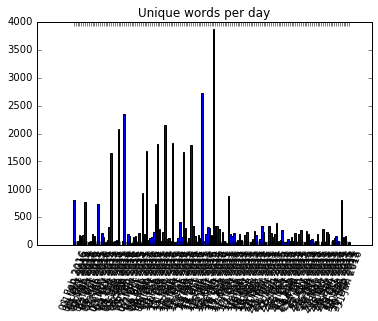

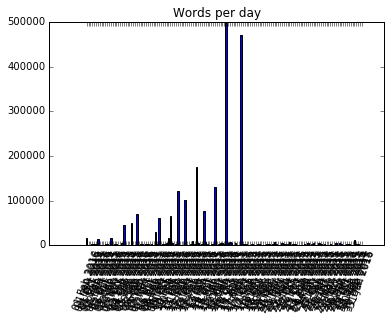

In [47]:
#Question 7:
dates = {}
date_unique = {}

for x in data_list:
    unique_words = {}
    if x[0] in dates:
        dates[x[0]] += len(x[1])
    else:
        dates[x[0]] = len(x[1])
    words = x[1].split(" ")
    if x[0] not in date_unique:
        for word in words:
            clean = re.sub('[^A-Za-z0-9]+', '', word)
            if clean in unique_words:
                unique_words[clean] += 1
            else:
                unique_words[clean] = 1
        date_unique[x[0]] = unique_words
    else:
        
        for word in words:
            clean = re.sub('[^A-Za-z0-9]+', '', word)
            if clean in date_unique[x[0]]:
                date_unique[x[0]][clean] += 1
            else:
                date_unique[x[0]][clean] = 1
        
unique_count = {}    
for date in date_unique:
    count = 0
    for word in date_unique[date]:
        if date_unique[date][word] == 1:
            count += 1
    unique_count[date] = count
           
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import numpy as np
%matplotlib inline

sorted_count = collections.OrderedDict(sorted(unique_count.items()))
plt.bar(range(len(sorted_count)), sorted_count.values(), align='center')
plt.xticks(rotation=70) 
plt.xticks(range(len(sorted_count)), sorted_count.keys())
plt.title("Unique words per day")

plt.show()

sorted_dates = collections.OrderedDict(sorted(dates.items()))
plt2.bar(range(len(sorted_dates)), sorted_dates.values(), align='center')
plt2.xticks(rotation=70)
plt2.xticks(range(len(sorted_dates)), sorted_dates.keys())
plt2.title("Words per day")

plt2.show()

### JSON parsing

1. Download <http://maartenmarx.nl/teaching/ISatWork/NoteBooks/consuming-json-data-from-a-web-service.ipynb>, remove all code blocks, and turn it into a notebook again. 
2. Check that what you did is correct and you did not remove too much using a notebook viewer.
3. Now extract all code from the downloaded notebook, save it to a file, and execute it as a Python script. Does it give errors? Is it syntactically correct?

In [ ]:
#JSON Parsing:



### PDF parsing

1. Save a wordfile as PDF, open it in Python, extract all text. Describe the differences, if any. Try the same with a two column PDF file from the web. This exercise gets more interesting if you use _difficult_ PDF. Why not try <http://wch.github.io/latexsheet/latexsheet.pdf>?

* Is the word order still as it should be?
* What about the strange characters?

In [7]:
#PDF parsing:

import sys
import pyPdf
from pyPdf import PdfFileReader

files = PdfFileReader(file("test.pdf", "rb"))
for x in range(files.getNumPages()):
    print files.getPage(x).extractText()


Data Mining Lab 1 Niek de Visscher 10667474 Deel 1: 1) De regel om te kijken of er getennist kan worden: (outlook = overcast)  De accuracy van deze regel is 100% 2) accuracy voor de test = 100% accuracy voor de cross-validation = 64.3% 3.1) Bij de ZeroR is de accuracy voor beide gevallen: 64.3% 3.2)Ik vind de ZeroR een redelijke baseline, omdat er hierbij meteen wordt gekeken naar de meest voorkomende class. Dit zorgt ervoor dat er hieruit ook meteen gevonden kan worden welke attributen de meeste invloed hebben op deze class. Ik kan persoonlijk geen andere baseline verzinnen. 3.3)Met behulp van cross-validation kan er gezorgd worden dat er gegeneraliseerd kan worden voor andere datasets. Door cross-validation kan dus worden gekeken hoe accuraat het model is voor de gegeven training en test data. 4)  Het is nodig om te kijken naar andere gegevens dan de accuracy omdat hieruit afgeleid kan worden wat nu het verschil is tussen de verschillende methodes. Zo kan gezien worden uit de confusi

# Part 2 Python recap

Download [PythonRecap2.0.ipynb](PythonRecap2.0.ipynb),  and answer all questions as asked.